# Probability distribution for 3d6 pick highest

## Generate the number of dice needed

In [115]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp


def GenDice(NFace =6, NDice=2, Sample=int(1e6)):
    rng = np.random.default_rng()
    
    dice = rng.integers(low=1,high=NFace+1,size=Sample)

    for i in range(NDice-1):
        dicetemp = rng.integers(low=1,high=NFace+1,size=Sample)
        dice = np.vstack((dice,dicetemp))
    return dice.T
print(GenDice(6,3,int(1e6))[1,:])
print(GenDice(6,3).shape)

[6 5 5]
(1000000, 3)


In [124]:
import heapq
def TwoHighest(dice) :
    SampleSize = dice.shape[0]
    res = np.ones(SampleSize)
    
    for i in range(SampleSize):
        temp = heapq.nlargest(2,dice[i,:])
        res[i] =  temp[0] + temp[1]
    return res
def TwoLowest(dice) :
    Sample = dice.shape[1]
    res = np.ones(Sample)


    for i in range(Sample):
        temp = heapq.nlowest(2,dice[i,:])
        res[i] =  temp[0] + temp[1]

    return res

In [125]:
ThreeDice6 = GenDice(6,3,int(1e5))
Proba = TwoHighest(ThreeDice6)

(array([0.00462, 0.01369, 0.0318 , 0.05577, 0.08753, 0.12482, 0.15737,
        0.16914, 0.15718, 0.1241 , 0.07398]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 11 artists>)

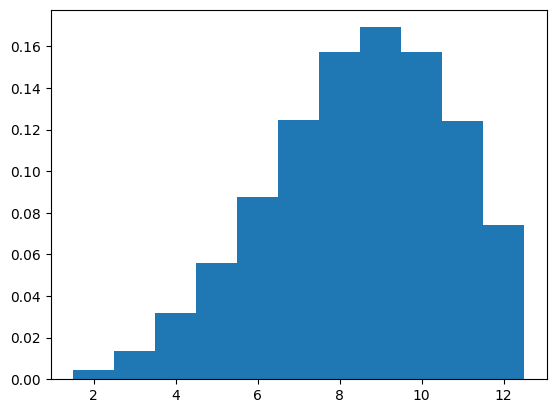

In [126]:
plt.figure()
plt.hist(Proba,bins=11,range=(2,13),density=True,align="left")